# Lasso Regression

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

### Read csv first to analyze the dependent and independent variable ,which is used directly by the class

In [2]:
dataset = pd.read_csv('Advertising.csv')     # Put you filename here
dataset                                   # show the dataset

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


### Creating Class

In [6]:
class LassoRegression:
    def __init__(self, dataset, NameofIndependentVar, NameofDependentVar ,split_fraction = None, cross_validation = None):
        if split_fraction is None:
            split_fraction = 0.2 
        if cross_validation is None:
            cross_validation = 5
        self.cross_validation = cross_validation
        self.split_fraction = split_fraction
        self.dataset = dataset
        self.NameofIndependentVar = NameofIndependentVar
        self.NameofDependentVar = NameofDependentVar
        
    def test(self):
        # load and describe data
        dataset_n  =  pd.read_csv(self.dataset)
        print("Shape of Dataset   ---> " , str(dataset_n.shape) + "\n\n\n" )
        print("Describe the Dataset   ---> " + "\n")
        print(dataset_n.describe())
        Var_X = self.NameofIndependentVar
        Var_Y = self.NameofDependentVar
        
        #Histogram plot of dependent variable
        plt.figure(figsize=(15,10))
        plt.tight_layout()
        seabornInstance.distplot(dataset_n[Var_Y])
        
        # Splitting independent and dependent variable
        X = dataset_n[Var_X].values
        y = dataset_n[Var_Y].values
        
        # Splitting into train and test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.split_fraction, random_state=0)
        print("\n\n\n")
        print("Shape of training data   ---> ",str(X_train.shape))
        print("Shape of test data   ---> ",str(X_test.shape))
        
        #Creating dictionary for parameters for gridsearch
        parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

        #Fitting the train data 
        lasso = Lasso()
        lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv = 5)
        lasso_regressor.fit(X_train, y_train)
        
        #Prediction of result
        Y_predicted = lasso_regressor.predict(X_test)
        
        # Best parameters learned by Ridge Regression
        print("\n\n\n")
        print("Value of best parameters   ---> ")
        print(lasso_regressor.best_params_)
        print(lasso_regressor.best_score_)
        
        # Creating dataframe of test and predicted value
        df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': Y_predicted.flatten()})
        print("\n\n\n")
        print("Value of test and predicted data   ---> "+"\n")
        print(df)
        print("\n\n\n")
        # Plot first few predicted and test values
        print("Compare histogram of dependent variable and graph of first few test vs predicted value   ---> "+ "\n")
        df1 = df.head(25)
        df1.plot(kind='bar',figsize=(16,10))
        plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
        plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
        plt.show()
        print("\n\n\n")
  
        # Calculating the metric
        print("The value of different Errors   ---> "+"\n")
        print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Y_predicted))  
        print('Mean Squared Error:', metrics.mean_squared_error(y_test, Y_predicted))  
        print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Y_predicted)))

#### Input of class

LassoRegression('file_location.csv',[IndependentVariable],[DependentVariable],degree_of_polynomial,test_train_split)


Note 
   - The dataset file should be in .csv format and it should be a cleaned dataset(Categorical data should be pre-processed)
   - The independent variables should be input as list  

In [7]:
las = LassoRegression('Advertising.csv',['TV','radio','newspaper'],'sales', 0.2,5)

Shape of Dataset   --->  (200, 5)



Describe the Dataset   ---> 

       Unnamed: 0          TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000




Shape of training data   --->  (160, 3)
Shape of test data   --->  (40, 3)




Value of best parameters   ---> 
{'alpha': 1}
-2.5898111735828966




Value of test and predicted data   ---> 

    Actual  Predicted
0     11.3  10.055508
1      8.4   7.506455
2      8.7   7.146928
3     25.4  24.003473
4     11.7  12.120519
5      8.7  

C:\Users\boltuzamaki\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\boltuzamaki\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\boltuzamaki\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\boltuzamaki\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of itera

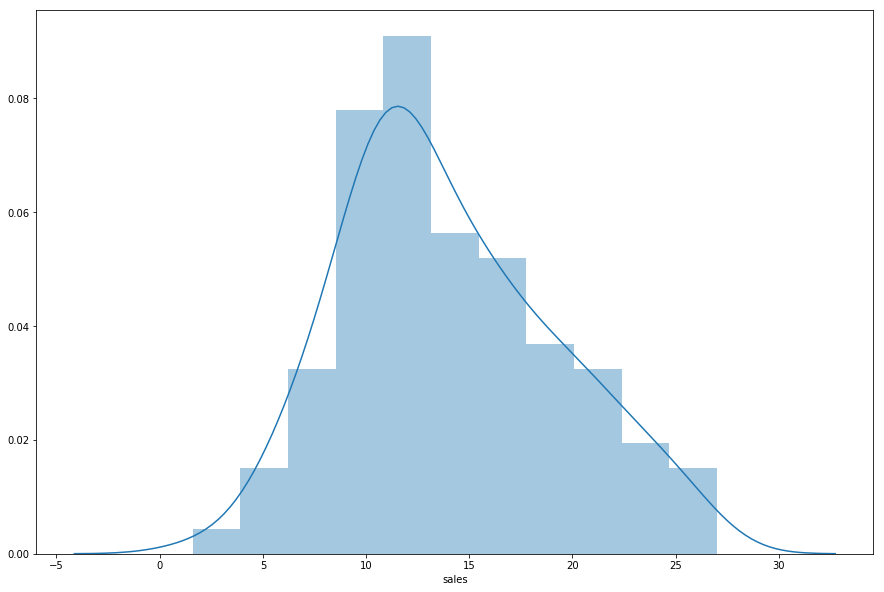

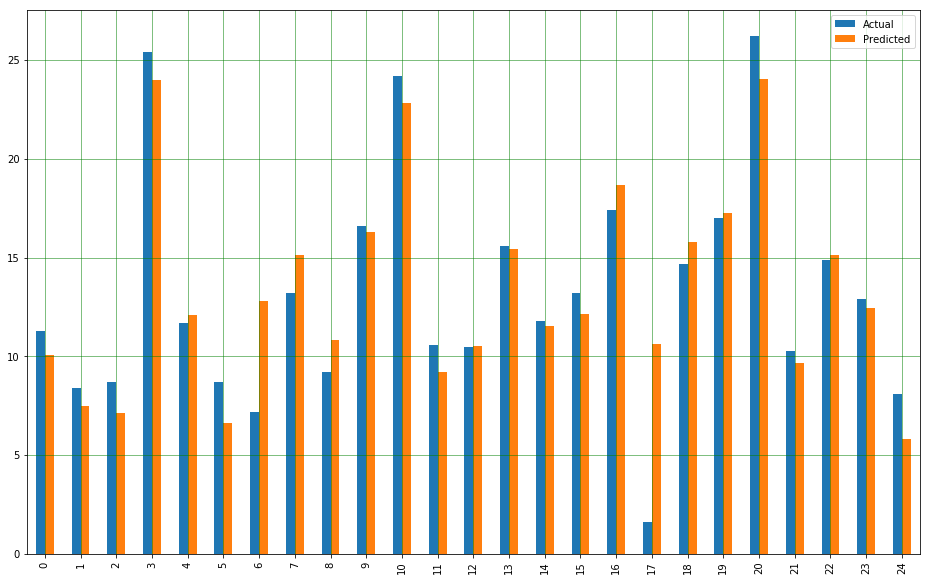





The value of different Errors   ---> 

Mean Absolute Error: 1.363863034897014
Mean Squared Error: 4.336766740202981
Root Mean Squared Error: 2.0824905138326515


In [8]:
las.test()